
# Simple Agents Using Reinforcement Learning



In [13]:
!pip install tf-agents[reverb] > /dev/null 2>&1

In [5]:
#Importing Libraries
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts

In [44]:
# Creating an Environment
environment = suite_gym.load('CartPole-v0')
print('action_spec:', environment.action_spec())
print('\ntime_step_spec.observation:', environment.time_step_spec().observation)
print('\ntime_step_spec.step_type:', environment.time_step_spec().step_type)
print('\ntime_step_spec.discount:', environment.time_step_spec().discount)
print('\ntime_step_spec.reward:', environment.time_step_spec().reward)


action_spec: BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)

time_step_spec.observation: BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

time_step_spec.step_type: ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')

time_step_spec.discount: BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

time_step_spec.reward: ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


In [2]:
# Intsalling the dependencies for rendering display
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Creating a Display for Rendering
from IPython import display as ipythondisplay
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [28]:
pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-p_v3rw1q
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-p_v3rw1q
  Resolved https://github.com/tensorflow/docs to commit c1510dc5ad73aa829249822798e6263360b0f62a
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=180353 sha256=2e2cd165b8f0bcdb4c5815e41dcf7d7fe2844ad6295d1ad350d2e46c23b36c5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_aw_cd_m/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


<ul>
<li><h3>Implement the CartPole environment for certain number of steps<h3></li>
</ul>

In [36]:
env =  suite_gym.load('CartPole-v0')

tf_env = tf_py_environment.TFPyEnvironment(env)
time_step = tf_env.reset()
num_steps = 200
transitions=[]
reward = 0
reward_seq = []

# img = plt.imshow(env.render('rgb_array'))
screen = env.render()
images = [Image.fromarray(screen)]

for i in range(num_steps):
  action = tf.random.uniform([1],0,2, dtype=tf.int32)
  next_time_step = tf_env.step(action)
  transitions.append([time_step, action, next_time_step])
  step_reward = next_time_step.reward
  reward_seq.append(step_reward)
  # img.set_data(env.render('rgb_array')) 
  if i % 10 == 0:
      screen = env.render()
      images.append(Image.fromarray(screen))
  reward += step_reward
  time_step = next_time_step

np_transitions = tf.nest.map_structure(lambda x: x.numpy(), transitions)
# print('\n'.join(map(str,np_transitions)))
print('Total Reward: ',reward.numpy())

Total Reward:  [191.]


In [37]:
image_file = 'cartpole-v0_steps.gif'
images[0].save(image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


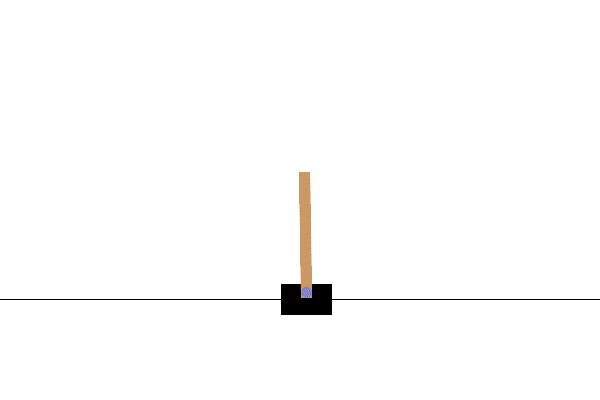

In [38]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)

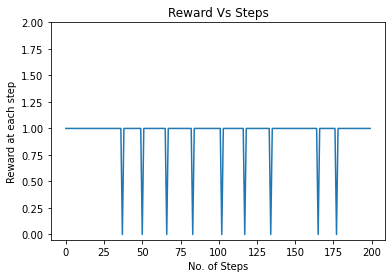

In [28]:
iterations = range(0, num_steps)
plt.plot(iterations, reward_seq)
plt.title("Reward Vs Steps")
plt.ylabel('Reward at each step')
plt.xlabel('No. of Steps')
plt.ylim(top=2)
plt.show()

<ul>
<li><h3>Implement the CartPole environment for certain number of Episodes<h3></li>
</ul>

For RL tasks that have a well-defined end or Terminal state, a complete sequence from the starting state to the end state is called an episode<br>
Each episode is independent of the next one.

In [45]:
# Loading the CartPole Environment
env = suite_gym.load('CartPole-v0')

# Creating object of Tensorflow Python Enviroment
tf_env = tf_py_environment.TFPyEnvironment(env)
time_step = tf_env.reset()

# Defining Variables
num_episodes = 10
rewards = []
steps = []

screen = env.render()
images = [Image.fromarray(screen)]
# img = plt.imshow(env.render('rgb_array'))

for _ in range(num_episodes):
  eps_reward = 0
  eps_steps = 0
  i=0
  while not time_step.is_last():
    action = tf.random.uniform([1],0,2, dtype=tf.int32)
    time_step = tf_env.step(action)
    eps_steps += 1
    eps_reward += time_step.reward.numpy()
    i += 1
    if i % 10 == 0:
      screen = env.render()
      images.append(Image.fromarray(screen))
    # img.set_data(env.render('rgb_array')) 
    
  rewards.append(eps_reward)
  steps.append(eps_steps)
  time_step = tf_env.reset()

num_steps = np.sum(steps)
avg_length = np.mean(steps)
avg_reward = np.mean(rewards)

print('Number of Episodes: ',num_episodes, 'Number of Steps: ',num_steps)
print('Average Length: ',avg_length)
print('Average Reward over 10 Episodes: ',avg_reward)

Number of Episodes:  10 Number of Steps:  237
Average Length:  23.7
Average Reward over 10 Episodes:  23.7


In [46]:
image_file = 'cartpole-v0_episodes.gif'
images[0].save(image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


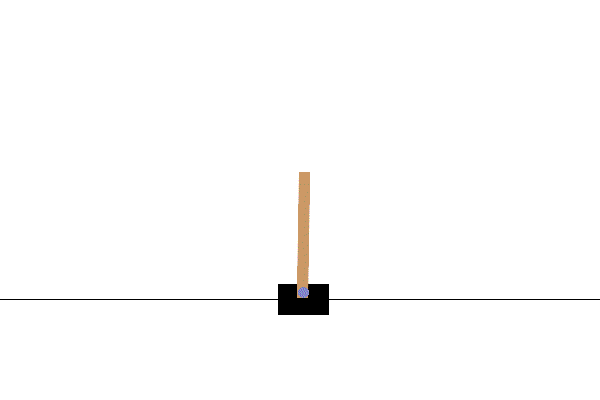

In [47]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)

This gif contains some steps from all the Episodes

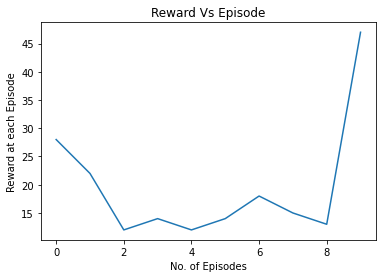

In [25]:
import matplotlib.pyplot as plt

iterations = range(0, 10)
plt.plot(iterations, rewards)
plt.title("Total Reward Vs Episode")
plt.ylabel('Total Reward at each Episode')
plt.xlabel('No. of Episodes')
# plt.ylim(top=220)
plt.show()

<ul>
<li><h3>Compare and comment on the rewards earned for both approaches.<h3></li>
</ul>

<ul>
<li>If we Implement the CartPole environment for a certain number of Steps then it requires many steps to reach the desired total reward </li>
<li>If we Implement the CartPole environment for a certain number of Episodes then it gives high reward for less steps per episode</li>
<li>Hence Enviroment with certain number of Episodes is more Efficient than that with certain number of Steps.